In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35

df0 = pd.read_parquet( "../data/df0.parquet" )
df1 = pd.read_parquet( "../data/df1.parquet" )  ### 추가 피쳐: 페이백율, 할인률, 종합혜택률, 구매시각추출, 구매건카운트
df2 = pd.read_parquet( "../data/df2.parquet" )
df3 = pd.read_parquet( "../data/df3.parquet" )  ### 추가 피쳐: 가입시각추출, 상업코드

print(df0.shape, df1.shape, df2.shape, df3.shape, sep=" "*5)
# display(df0.head(2))
# display(df1.head(2))
# display(df2.head(2))
# display(df3.head(2))

(5623810, 14)     (5623810, 23)     (544921, 17)     (544921, 31)


In [29]:
df0.head()

,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000
1,13015,40,0,0,0,1981-08-27,2019-07-18 22:51:53.022,2019-08-01 00:32:56.346,7,10900,5900,0,5000,5000
2,210615,34,1,0,0,1987-01-19,2019-06-17 09:08:11.430,2019-08-01 00:32:57.160,4,10900,5900,0,5000,5000
3,424964,40,0,1,0,1981-04-07,2019-07-10 13:38:45.467,2019-08-01 00:32:57.680,6,11770,6770,0,5000,5000
4,194227,39,1,1,0,1982-04-02,2019-07-22 04:31:12.322,2019-08-01 00:32:57.712,8,9800,4800,0,5000,5000


## merchant_id 를 분석해 보자. 먼저 몇 개의 데이터가 있을까?

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_6972/2421309658.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


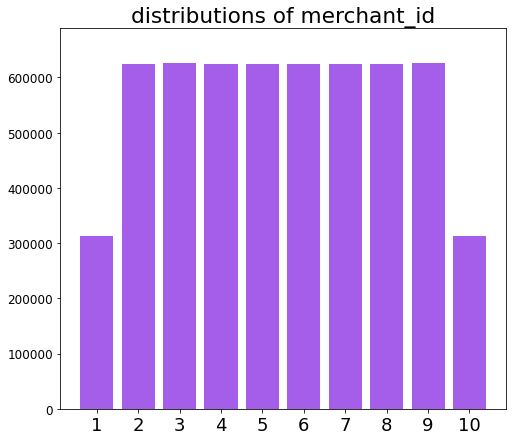

In [24]:
plt.figure(figsize=(8,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
b = df0.m_id.value_counts()
plt.title('distributions of merchant_id')
aaa = plt.bar(b.index,b,color='#a55eea')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
plt.ylim(0,m_h*1.1)
plt.show()

정말 신기하게도 거의 동일한 개수를 보여준다.

* 성별을 기준으로 merchant_id 개수는?

In [32]:
df0.groupby('man').m_id.value_counts().sort_index()

man  m_id
0    1       225685
     2       451566
     3       453239
     4       452268
     5       451290
     6       451833
     7       451893
     8       452875
     9       453184
     10      226244
1    1        86507
     2       172492
     3       173074
     4       172833
     5       172925
     6       172887
     7       172394
     8       171931
     9       172835
     10       85855
Name: m_id, dtype: int64

두 가지 중에 하나다.

사람들이 정말 고르게 구매를 하거나 merchant_id는 가공된 데이터일 수 있다.

### 근거 1 : 차이에 가입한 고객이 첫 번째 두 번째로 구매하는 merchant_id를 찾아보자.

** 2019년 8월 1일 이후 가입한 유저들만 뽑는다.

** 신규 가입자는 첫 구매를 어디에서 했는가?

In [36]:
new_member_purchase.groupby('id').count()

,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total
id,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1
5,6,6,6,6,6,6,6,6,6,6,6,6,6
6,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544917,2,2,2,2,2,2,2,2,2,2,2,2,2
544918,21,21,21,21,21,21,21,21,21,21,21,21,21
544919,43,43,43,43,43,43,43,43,43,43,43,43,43


/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_6972/575688873.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


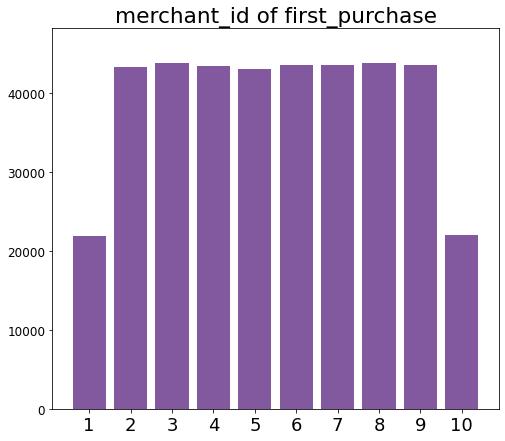

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_6972/575688873.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


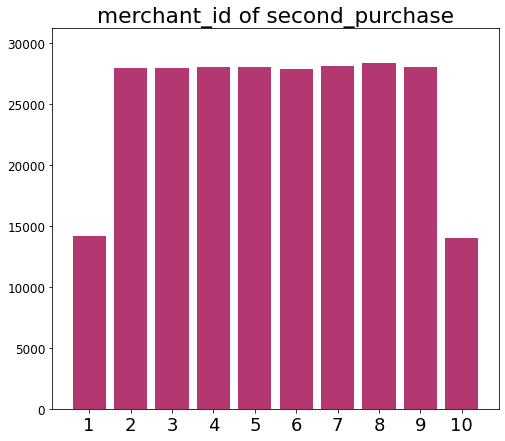

In [34]:
new_member_purchase = df0[df0.sign > '2019-08-01']
first_purchase = new_member_purchase.groupby('id', as_index=False).nth(0).m_id.value_counts().sort_index()

plt.figure(figsize=(8,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
plt.title('merchant_id of first_purchase')
aaa = plt.bar(first_purchase.index,first_purchase,color='#82589F')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
plt.ylim(0,m_h*1.1)
plt.show()

second_purchase = new_member_purchase.groupby('id', as_index=False).nth(1).m_id.value_counts().sort_index()

plt.figure(figsize=(8,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
plt.title('merchant_id of second_purchase')
aaa = plt.bar(second_purchase.index,second_purchase,color='#B33771')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
plt.ylim(0,m_h*1.1)
plt.show()

** 신규 가입자는 두 번째 구매를 어디에서 했는가?

결과 : 1번과 10번 merchant_id를 합하면 신기하게도 거의 동일한 값을 지니게 된다. 말도 안된다.

### 근거 2 : 비싼 금액대의 상품이 어떤 merchant_id에서 판매되었는지 살펴보자.

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_6972/3203916090.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


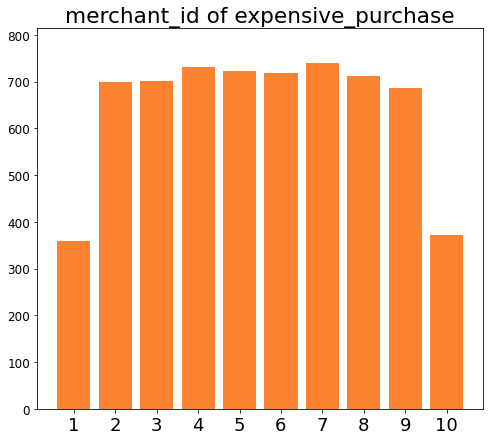

In [40]:
# 가정 : 금액이 큰 결제건의 경우 특정 merchant에 쏠려 있을 것이다.
df0[df0.pre > 500000].pre.value_counts()
expensive_purchase = df0[df0.pre == 935000].m_id.value_counts().sort_index()

plt.figure(figsize=(8,7),facecolor="white")
plt.rc('font', size=18)
plt.rc('ytick', labelsize=12) 
plt.title('merchant_id of expensive_purchase')
aaa = plt.bar(expensive_purchase.index,expensive_purchase,color='#fa8231')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
m_h = 0
for rect in aaa:
    height = rect.get_height()
    m_h = max(m_h,height)
plt.ylim(0,m_h*1.1)
plt.show()

결과 : 935000원 짜리 상품을 어떻게 고르게 판매할 수 있는가? 심지어 1번과 10번을 합하면 역시나 전체가 비슷한 개수를 보이는 모습이다.

## 결론 : 이것은 만들어진 데이터이다. 

그렇다면 왜 가공했을까?